In [1]:
from utility_based_gaussian_noise_sampler import UtilityBasedGaussianNoiseSampler
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
pd.set_option('display.max_rows',100)
data = pd.read_csv('test/ImbR.csv', index_col=0)
data

,X1,X2,Tgt
0,8.598811,9.646846,10.147398
1,9.424556,7.486556,12.117065
2,13.896771,10.390389,10.000030
3,10.176271,10.584084,10.679731
4,10.323219,10.888969,10.035441
...,...,...,...
995,1.099347,7.417908,20.084010
996,1.700612,13.693203,20.477744
997,2.528996,14.303922,20.144063
998,2.616128,5.795239,20.049739


# Test c_perc= list of percentage

In [3]:
gn_perc = UtilityBasedGaussianNoiseSampler(data, thr_rel=0.8, c_perc=[0.5,3])
method = gn_perc.getMethod()
extrType = gn_perc.getExtrType()
thr_rel = gn_perc.getThrRel()
controlPtr = gn_perc.getControlPtr()
c_perc_undersampling, c_perc_oversampling = gn_perc.getCPerc()
pert = gn_perc.getPert()
method, extrType, thr_rel, controlPtr, c_perc_undersampling, c_perc_oversampling, pert

('extremes', 'both', 0.8, [], [0.5], [3.0], 0.1)

In [4]:
resampled = gn_perc.resample()
len(resampled), resampled

(877,
             X1         X2        Tgt
 0     8.598811   9.646846  10.147398
 1     9.424556   7.486556  12.117065
 1     8.831767   7.199150  12.041860
 1     9.000285   7.404939  11.881803
 3    10.176271  10.584084  10.679731
 ..         ...        ...        ...
 998   2.616128   5.795239  20.049739
 998   2.683083   5.792495  19.876416
 999   1.375307  15.504206  20.381344
 999   1.496938  14.898955  19.603188
 999   1.332171  15.335230  20.048330
 
 [877 rows x 3 columns])

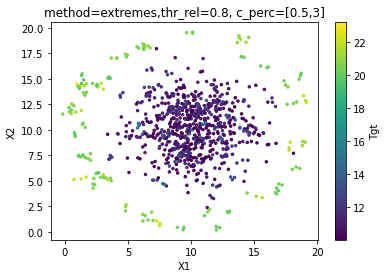

In [5]:
x = resampled['X1'].to_numpy()
y = resampled['X2'].to_numpy()
color = resampled['Tgt'].to_numpy()
plt.scatter(x, y, s=6.0, c=color)
cb = plt.colorbar()
cb.set_label('Tgt')
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('method=extremes,thr_rel=0.8, c_perc=[0.5,3]')
plt.show()

# Test c_perc= 'balance'

In [6]:
data = pd.read_csv('test/ImbR.csv', index_col=0)
gn_balance = UtilityBasedGaussianNoiseSampler(data, thr_rel=0.8, c_perc='balance')
method = gn_balance.getMethod()
extrType = gn_balance.getExtrType()
thr_rel = gn_balance.getThrRel()
controlPtr = gn_balance.getControlPtr()
c_perc = gn_balance.getCPerc()
pert = gn_balance.getPert()
method, extrType, thr_rel, controlPtr, c_perc, pert

('extremes', 'both', 0.8, [], 'balance', 0.1)

In [7]:
resampled = gn_balance.resample()
len(resampled), resampled

(1698,
            X1         X2        Tgt
 0    8.598811   9.646846  10.147398
 1    9.130100   7.172330  11.900000
 1    9.630470   7.555594  12.059395
 1    9.004780   7.182079  12.001224
 1    9.424556   7.486556  12.117065
 ..        ...        ...        ...
 999  1.489887  15.413922  19.995711
 999  1.444631  15.198670  20.351200
 999  1.152392  15.474200  19.655794
 999  1.691399  15.429602  19.806928
 999  1.651026  15.558695  20.314320
 
 [1698 rows x 3 columns])

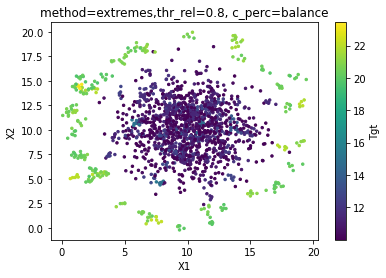

In [8]:
x = resampled['X1'].to_numpy()
y = resampled['X2'].to_numpy()
color = resampled['Tgt'].to_numpy()
plt.scatter(x, y, s=6.0, c=color)
cb = plt.colorbar()
cb.set_label('Tgt')
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('method=extremes,thr_rel=0.8, c_perc=balance')
plt.show()

# Test c_perc= 'extreme'

In [9]:
data = pd.read_csv('test/ImbR.csv', index_col=0)
gn_extreme = UtilityBasedGaussianNoiseSampler(data, thr_rel=0.8, c_perc='extreme')
method = gn_extreme.getMethod()
extrType = gn_extreme.getExtrType()
thr_rel = gn_extreme.getThrRel()
controlPtr = gn_extreme.getControlPtr()
c_perc = gn_extreme.getCPerc()
pert = gn_extreme.getPert()
method, extrType, thr_rel, controlPtr, c_perc, pert

('extremes', 'both', 0.8, [], 'extreme', 0.1)

In [10]:
resampled = gn_extreme.resample()
len(resampled), resampled

(5623,
            X1         X2        Tgt
 0    8.598811   9.646846  10.147398
 1    9.648902   7.800339  11.813293
 1    9.757334   7.269801  12.126323
 1    9.753667   7.671650  12.194009
 1    9.702210   7.542269  12.321605
 ..        ...        ...        ...
 999  1.512062  15.655942  20.344825
 999  1.332171  15.335230  20.048330
 999  1.829900  15.299139  20.007417
 999  1.567167  15.473288  20.382951
 999  1.018325  15.890620  19.665703
 
 [5623 rows x 3 columns])

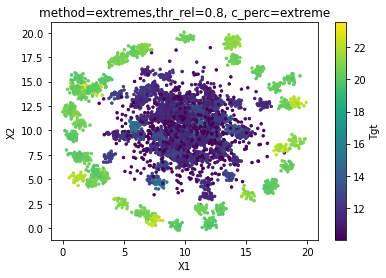

In [11]:
x = resampled['X1'].to_numpy()
y = resampled['X2'].to_numpy()
color = resampled['Tgt'].to_numpy()
plt.scatter(x, y, s=6.0, c=color)
cb = plt.colorbar()
cb.set_label('Tgt')
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('method=extremes,thr_rel=0.8, c_perc=extreme')
plt.show()